In [25]:
%pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import mglearn
import numpy as np

In [27]:
iris_dataset = load_iris()

In [28]:
print(f"Keys of iris_dataset:\n{iris_dataset.keys()}") 

Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
print(iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 


In [30]:
print(f"Target Names: {iris_dataset['target_names']}")

Target Names: ['setosa' 'versicolor' 'virginica']


In [31]:
print(f"Feature Names: {iris_dataset['feature_names']}")

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
print(f"Type of Data: {type(iris_dataset['data'])}")

Type of Data: <class 'numpy.ndarray'>


In [33]:
print(f"Data:\n{iris_dataset['data'][:10]}")

Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [34]:
print(f"Shape of Data:\n{iris_dataset['data'].shape}")

Shape of Data:
(150, 4)


In [35]:
print(f"Type of Target: {type(iris_dataset['target'])}")

Type of Target: <class 'numpy.ndarray'>


In [36]:
print(f"Shape of Target: {iris_dataset['target'].shape}")

Shape of Target: (150,)


In [37]:
print(f"Target: \n{iris_dataset['target']}")

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=1, test_size=0.3)


In [39]:
print(f"Training Set:\nX_train: {X_train.shape}\ny_train: {y_train.shape} \n\nTesting Set:\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

Training Set:
X_train: (105, 4)
y_train: (105,) 

Testing Set:
X_test: (45, 4)
y_test: (45,)


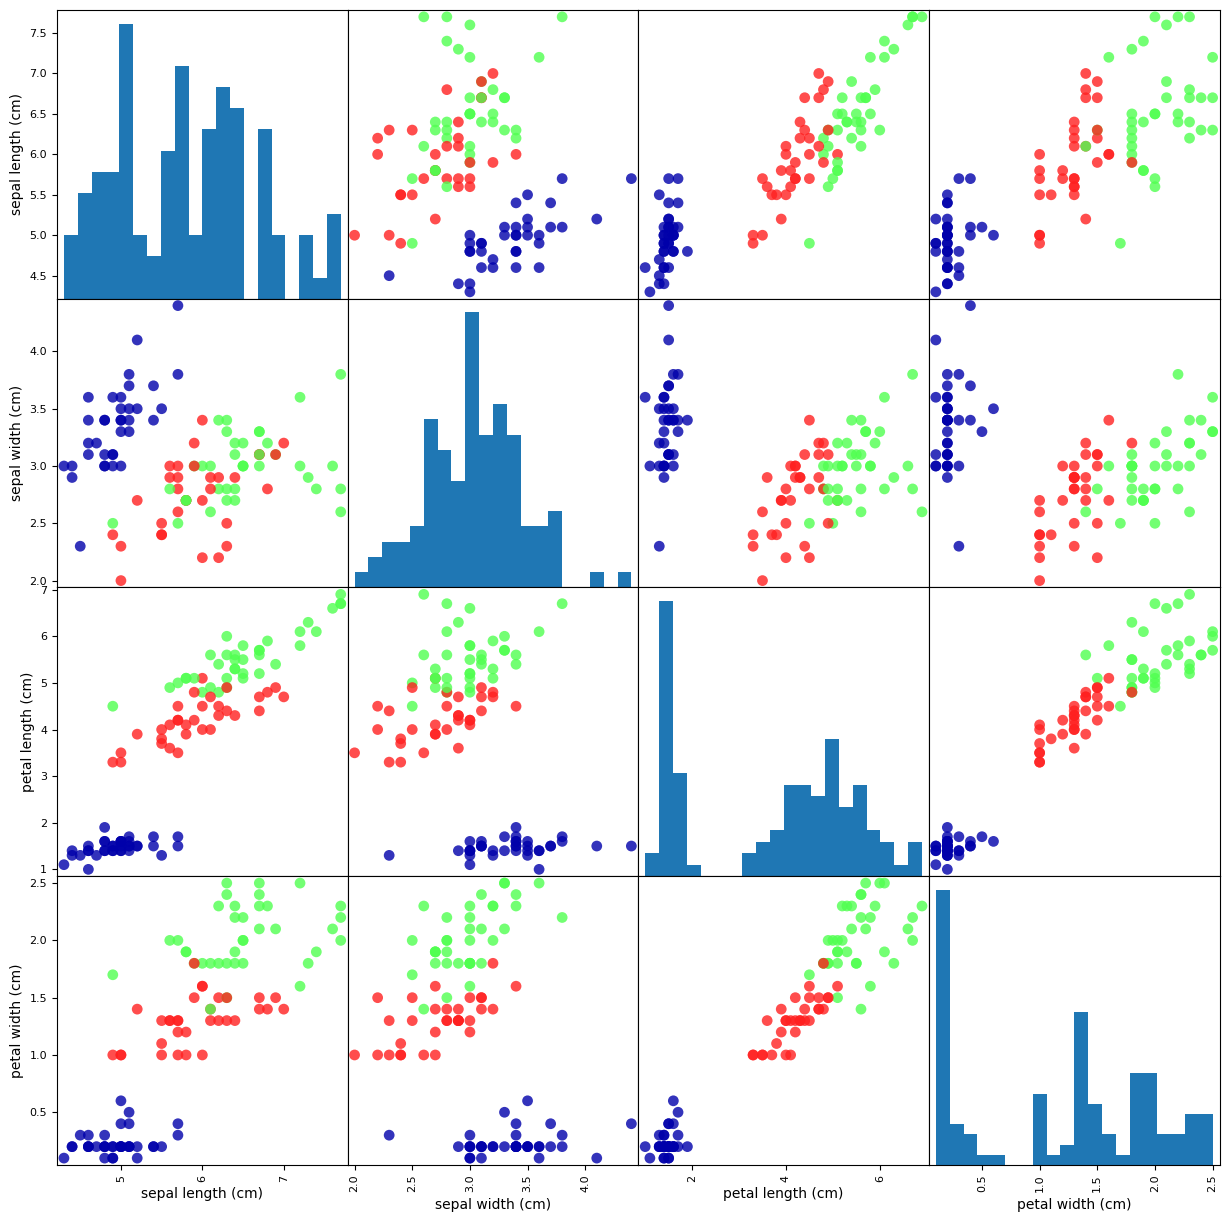

In [40]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
# Training/fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
# Sample predictions
X_new = np.array([[5,2.9,1,0.2], [1,1,4,0]]) # scikit-learn requires 2D array for data
print(f"New Sample: {X_new}\nShape: {X_new.shape}")

New Sample: [[5.  2.9 1.  0.2]
 [1.  1.  4.  0. ]]
Shape: (2, 4)


In [44]:
prediction = knn.predict(X_new)
print("Prediction:",prediction)
print("Prediction Name:",iris_dataset['target_names'][prediction])

Prediction: [0 1]
Prediction Name: ['setosa' 'versicolor']


In [45]:
y_pred = knn.predict(X_test)
print(f"Test set predictions:\n {y_pred}")

Test set predictions:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [46]:
# Accuracy using mean method
print(f"Test set score: {np.mean(y_pred == y_test):.2f}")

Test set score: 0.98


In [47]:
# Accuracy using score method
print(f"Test set score: {knn.score(X_test, y_test):.2f}")

Test set score: 0.98
